**Advicing drugs  to the patients**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

In [2]:
df = pd.read_excel("https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true", sheet_name="E Comm")
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
df.shape

(5630, 20)

In [4]:
pip install xlrd==2.0.1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [7]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [8]:
churn_rate = df["Churn"].value_counts()/len(df)*100
churn_rate

0    83.161634
1    16.838366
Name: Churn, dtype: float64

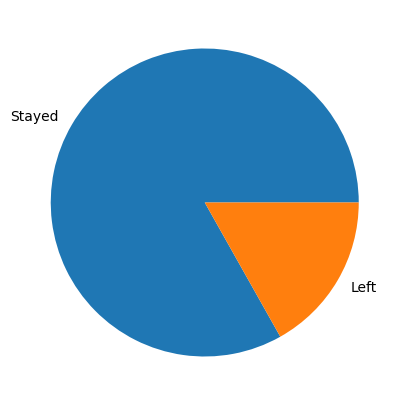

In [102]:
plt.figure(figsize=(10,5))
plt.pie(churn_rate, labels=['Stayed',"Left"])
plt.show()

In [10]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Text(0.5, 1.0, 'The Amount of Cashback')

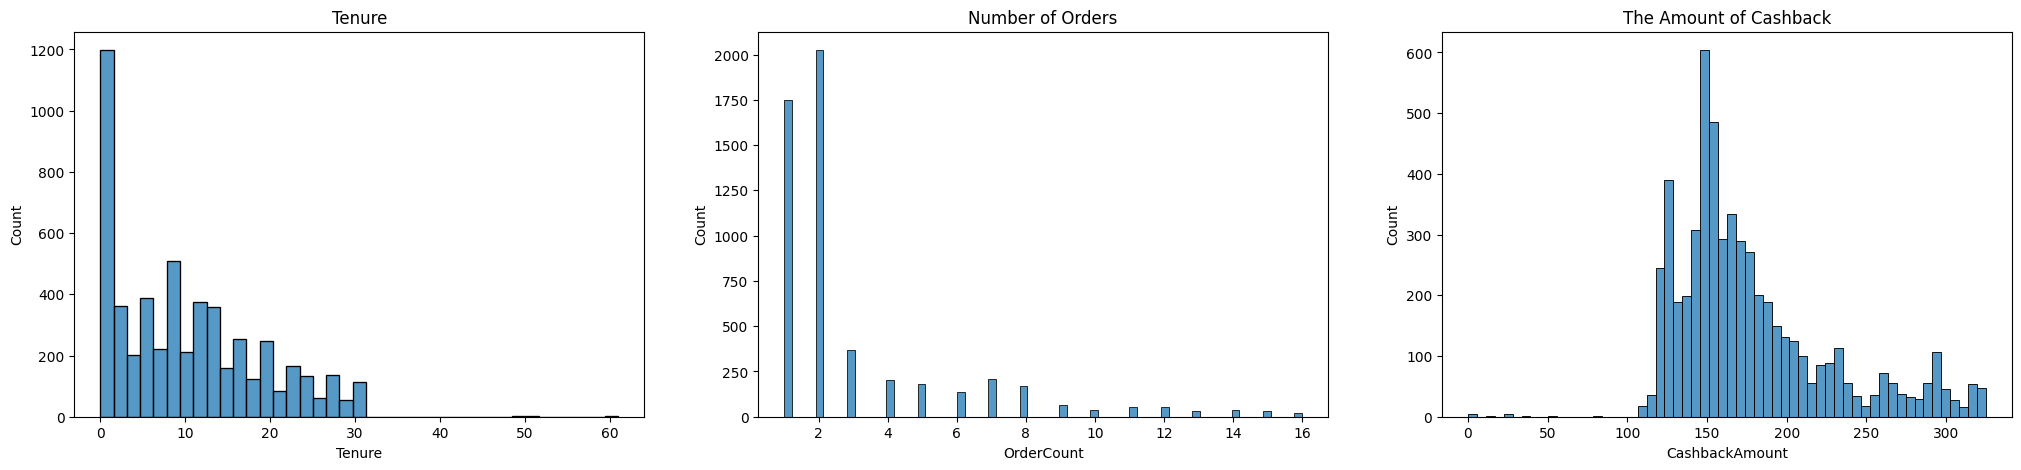

In [105]:
fig, axes = plt.subplots(1,3, figsize=(25,5))

sns.histplot(x='Tenure',data=df, ax=axes[0])
axes[0].set_title("Tenure")

sns.histplot(x='OrderCount', data=df, ax=axes[1])
axes[1].set_title("Number of Orders")

sns.histplot(x='CashbackAmount', data=df, ax=axes[2])
axes[2].set_title("The Amount of Cashback")

Text(0.5, 1.0, 'The Complain of Customers')

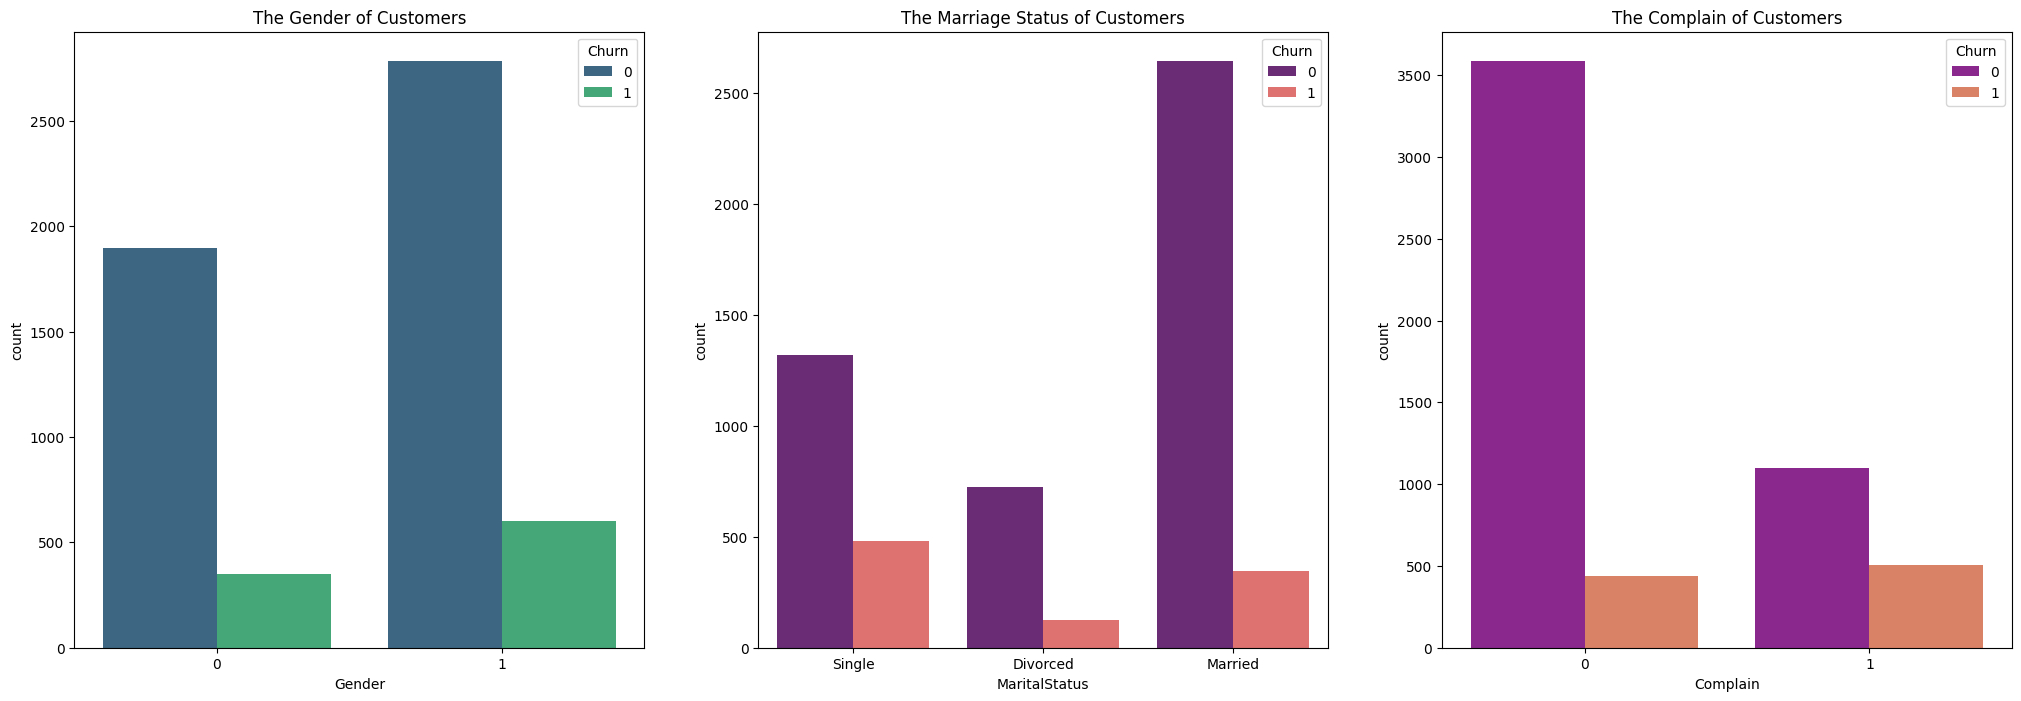

In [106]:
fig, axes = plt.subplots(1,3,figsize=(25,8))

sns.countplot(x='Gender', hue='Churn', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("The Gender of Customers")

sns.countplot(x='MaritalStatus', hue='Churn', palette='magma', data=df, ax=axes[1])
axes[1].set_title("The Marriage Status of Customers")

sns.countplot(x='Complain', hue='Churn', palette='plasma', data=df, ax=axes[2])
axes[2].set_title('The Complain of Customers')

In [37]:
df.corrwith(df['Churn']).abs().sort_values(ascending=False)

<ipython-input-37-b361e99cad45>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['Churn']).abs().sort_values(ascending=False)


Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

In [47]:
df['Gender'].replace("Male", 1, inplace=True)
df['Gender'].replace("Female", 0, inplace=True)
df.sample(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5253,55254,0,16.0,Computer,1,9.0,Debit Card,1,3.0,4,Fashion,1,Married,4,1,15.0,5.0,14.0,NaN,226.24
5599,55600,0,10.0,Mobile Phone,3,10.0,Credit Card,0,4.0,5,Fashion,1,Married,2,0,20.0,1.0,4.0,5.0,201.44
2077,52078,1,0.0,Computer,1,NaN,CC,0,2.0,3,Mobile,4,Single,1,0,17.0,0.0,1.0,2.0,124.22
3274,53275,0,16.0,Computer,1,15.0,Debit Card,1,4.0,4,Others,2,Married,3,0,NaN,1.0,15.0,10.0,309.30
1099,51100,0,NaN,Phone,1,23.0,CC,1,3.0,5,Mobile,3,Married,2,0,15.0,0.0,1.0,2.0,123.05
5179,55180,0,10.0,Mobile Phone,3,23.0,E wallet,0,4.0,5,Laptop & Accessory,5,Married,6,0,14.0,2.0,2.0,3.0,181.47
243,50244,1,3.0,Mobile Phone,3,28.0,E wallet,1,3.0,4,Laptop & Accessory,3,Divorced,3,1,12.0,1.0,1.0,0.0,163.80
1649,51650,0,12.0,Mobile Phone,1,6.0,Credit Card,1,2.0,1,Fashion,1,Married,1,0,17.0,1.0,3.0,7.0,196.13
5017,55018,1,8.0,Mobile Phone,1,17.0,Debit Card,1,4.0,4,Mobile Phone,3,Single,3,1,12.0,2.0,2.0,3.0,154.36
2393,52394,0,7.0,Phone,3,9.0,UPI,1,2.0,5,Laptop & Accessory,5,Single,4,0,18.0,2.0,3.0,12.0,147.59


In [48]:
df.corrwith(df['Churn']).abs().sort_values(ascending=False)

<ipython-input-48-b361e99cad45>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['Churn']).abs().sort_values(ascending=False)


Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
Gender                         0.029264
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

In [50]:
data = df[['Churn', 'Tenure', "Complain", "DaySinceLastOrder", "CashbackAmount",'Gender', 'MaritalStatus']]
data

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,Gender,MaritalStatus
0,1,4.0,1,5.0,159.93,0,Single
1,1,NaN,1,0.0,120.90,1,Single
2,1,NaN,1,3.0,120.28,1,Single
3,1,0.0,0,3.0,134.07,1,Single
4,1,0.0,0,3.0,129.60,1,Single
...,...,...,...,...,...,...,...
5625,0,10.0,0,4.0,150.71,1,Married
5626,0,13.0,0,NaN,224.91,1,Married
5627,0,1.0,1,4.0,186.42,1,Married
5628,0,23.0,0,9.0,178.90,1,Married


In [52]:
data.isnull().sum().sum()

571

In [54]:
data =data.dropna()
data.shape

(5059, 7)

In [57]:
data['Churn'].value_counts()/len(data)

0    0.839296
1    0.160704
Name: Churn, dtype: float64

In [58]:
encoded = pd.get_dummies(data)
encoded.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,Gender,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,1,5.0,159.93,0,0,0,1
3,1,0.0,0,3.0,134.07,1,0,0,1
4,1,0.0,0,3.0,129.60,1,0,0,1
5,1,0.0,1,7.0,139.19,0,0,0,1
8,1,13.0,1,2.0,126.83,1,1,0,0


In [60]:
X=encoded.drop("Churn", axis=1)
y=encoded['Churn']

In [62]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=0)

In [65]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       849
           1       0.75      0.38      0.50       163

    accuracy                           0.88      1012
   macro avg       0.82      0.68      0.72      1012
weighted avg       0.87      0.88      0.86      1012

Model accuracy: 0.8794466403162056


<Axes: >

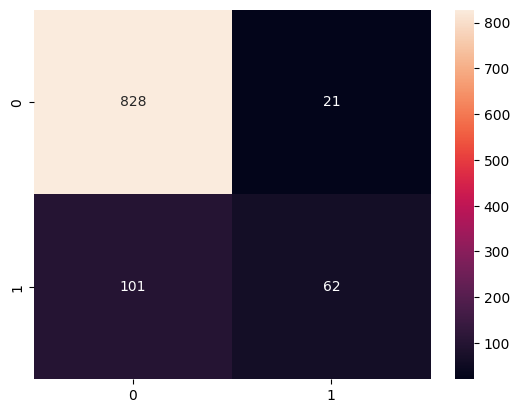

In [70]:
y_predict = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_predict))
print("Model accuracy:", metrics.accuracy_score(y_test, y_predict))

## confusion matrix

conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True, fmt='g')

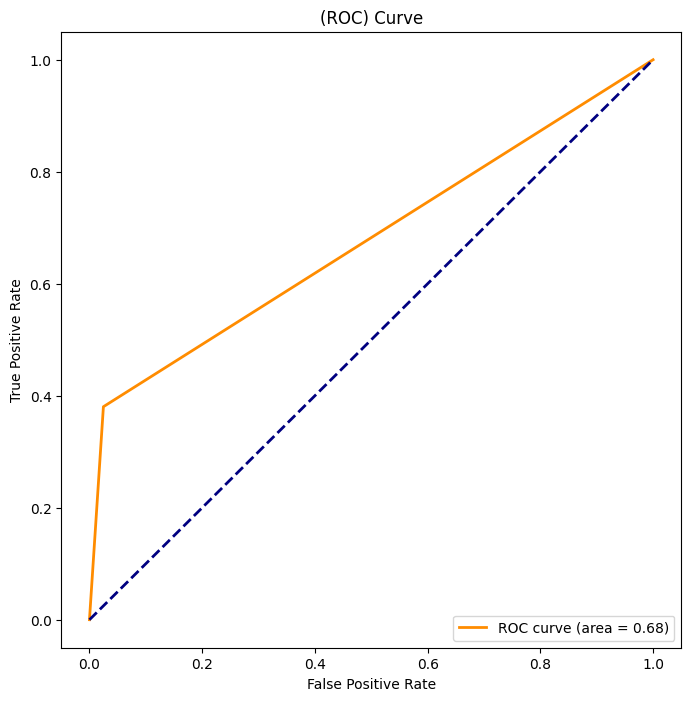

In [76]:
# Calculate the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)

# Calculate the area under the ROC curve (AUC)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       849
           1       0.67      0.32      0.43       163

    accuracy                           0.86      1012
   macro avg       0.77      0.64      0.68      1012
weighted avg       0.85      0.86      0.84      1012

Model accuracy: 0.8646245059288538


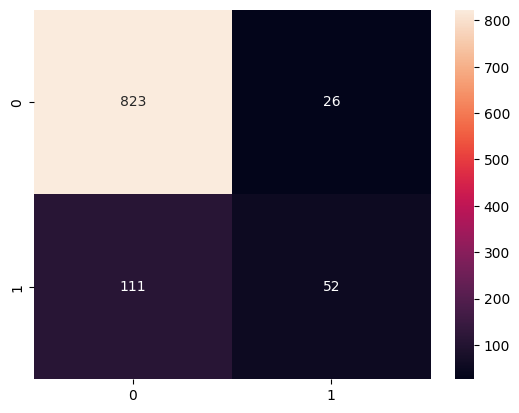

In [85]:
## SVM model

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_predict = svm_model.predict(X_test)
print(metrics.classification_report(y_test, y_predict))
print("Model accuracy:", metrics.accuracy_score(y_test, y_predict))


conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

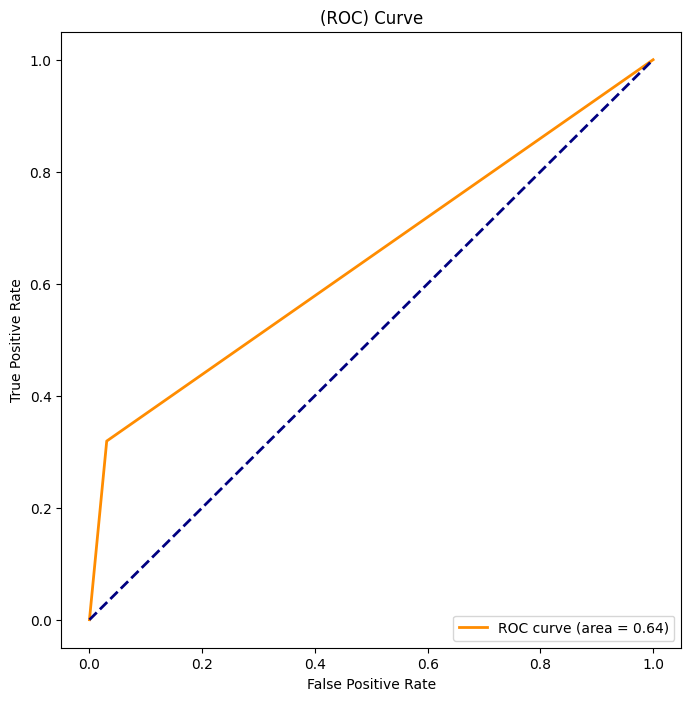

In [86]:
# Calculate the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)

# Calculate the area under the ROC curve (AUC)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       849
           1       0.84      0.89      0.87       163

    accuracy                           0.96      1012
   macro avg       0.91      0.93      0.92      1012
weighted avg       0.96      0.96      0.96      1012

Model accuracy: 0.9555335968379447


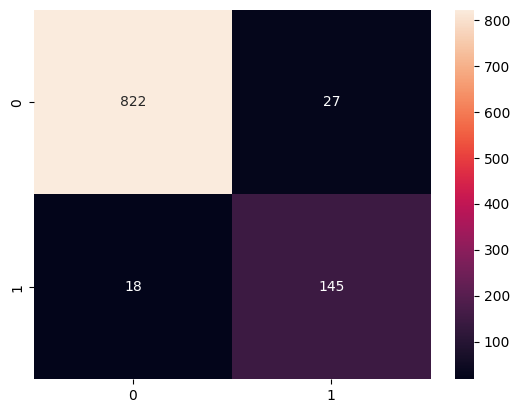

In [88]:
tree_model = DecisionTreeClassifier()

tree_model.fit(X_train, y_train)

y_predict = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_predict))
print("Model accuracy:", metrics.accuracy_score(y_test, y_predict))


conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

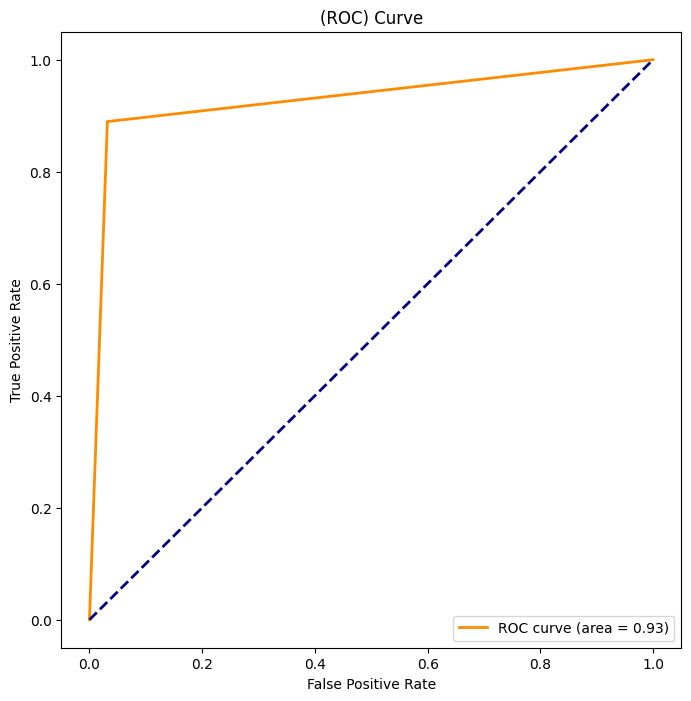

In [89]:
# Calculate the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)

# Calculate the area under the ROC curve (AUC)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       849
           1       0.86      0.81      0.84       163

    accuracy                           0.95      1012
   macro avg       0.91      0.89      0.90      1012
weighted avg       0.95      0.95      0.95      1012

Model accuracy: 0.9486166007905138


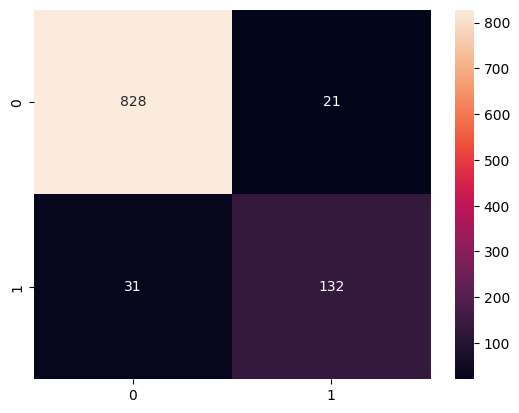

In [91]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_predict = rf_model.predict(X_test)
print(metrics.classification_report(y_test, y_predict))
print("Model accuracy:", metrics.accuracy_score(y_test, y_predict))


conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

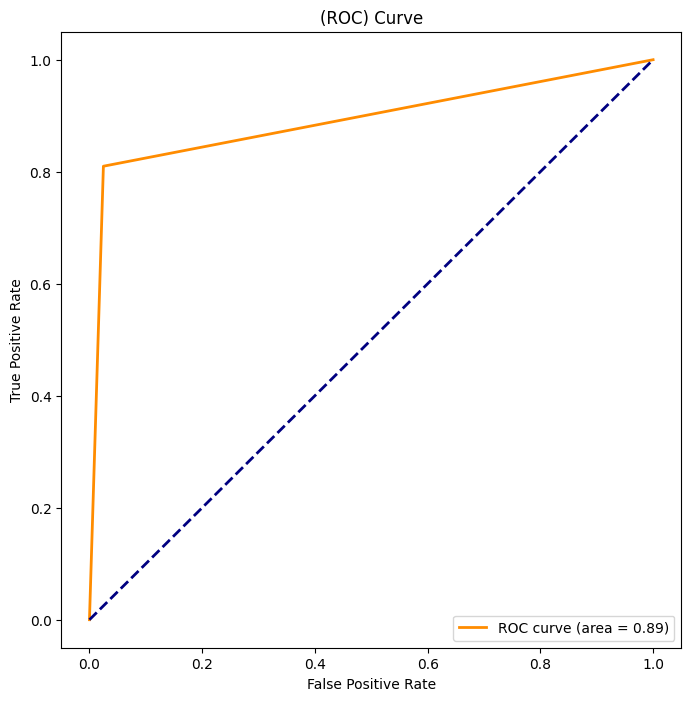

In [92]:
# Calculate the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)

# Calculate the area under the ROC curve (AUC)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       849
           1       0.86      0.80      0.83       163

    accuracy                           0.95      1012
   macro avg       0.91      0.89      0.90      1012
weighted avg       0.95      0.95      0.95      1012

Model accuracy: 0.9466403162055336


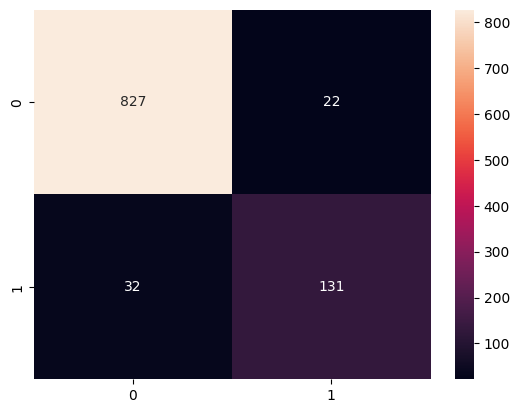

In [96]:
## RandomForest

RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

y_predict = RF_model.predict(X_test)
print(metrics.classification_report(y_test, y_predict))
print("Model accuracy:", metrics.accuracy_score(y_test, y_predict))


conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

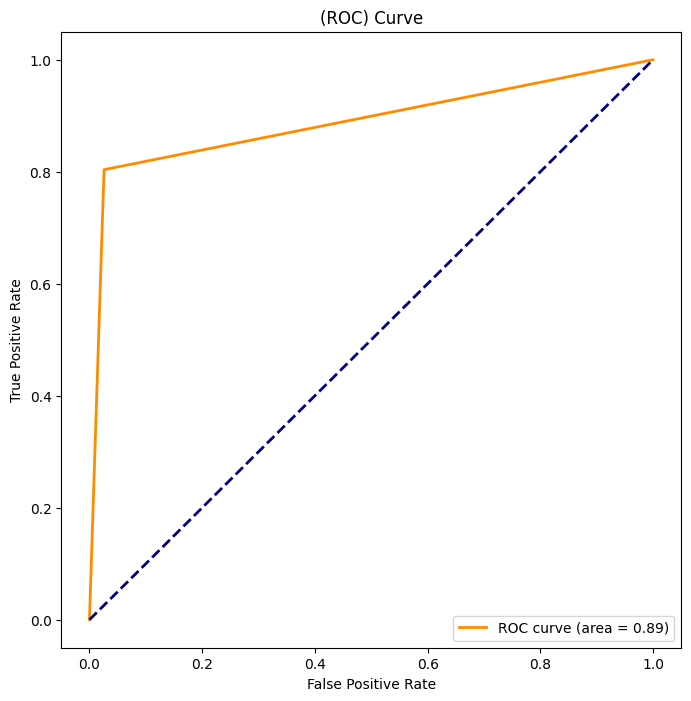

In [97]:
# Calculate the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)

# Calculate the area under the ROC curve (AUC)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       849
           1       0.86      0.78      0.82       163

    accuracy                           0.94      1012
   macro avg       0.91      0.88      0.89      1012
weighted avg       0.94      0.94      0.94      1012

Model accuracy: 0.9436758893280632


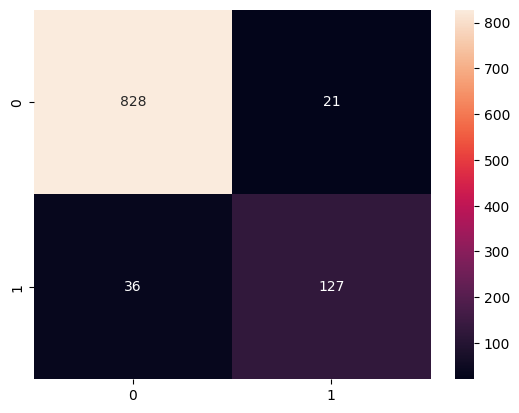

In [98]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_predict = xgb_model.predict(X_test)
print(metrics.classification_report(y_test, y_predict))
print("Model accuracy:", metrics.accuracy_score(y_test, y_predict))


conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()




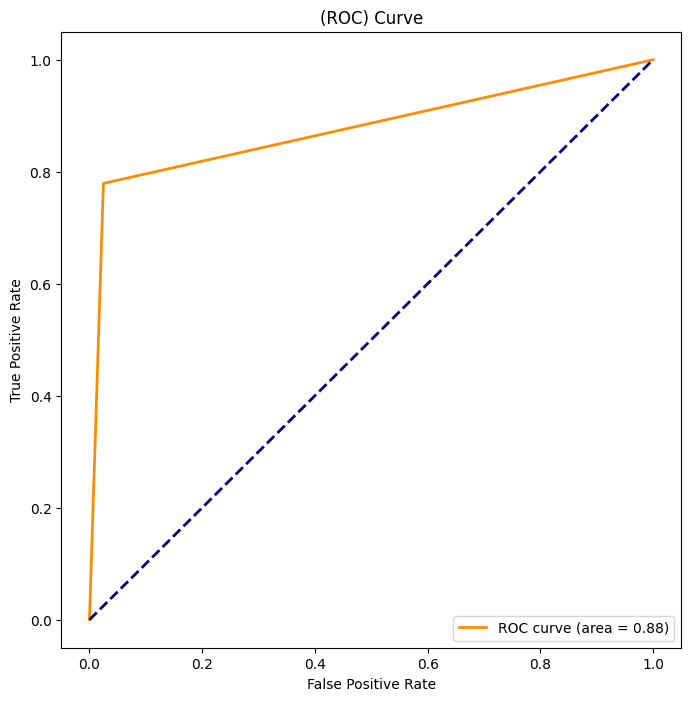

In [99]:
# Calculate the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)

# Calculate the area under the ROC curve (AUC)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()

ERROR: Could not find a version that satisfies the requirement git (from versions: none)
ERROR: No matching distribution found for git
